In [27]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv('lending_data.csv')

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [12]:
# getting the number of rows in the dataset
print(len(df))

77536


In [23]:
# getting the datatypes of features and the target variable in the dataset
print(df.dtypes)

loan_size           float64
interest_rate       float64
borrower_income       int64
debt_to_income      float64
num_of_accounts       int64
derogatory_marks      int64
total_debt            int64
loan_status           int64
dtype: object


In [25]:
# getting the null value count for each feature to handle null values
print(df.isnull().sum())

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64


In [5]:
# getting the unque labels in target variable
print(df['loan_status'].unique())

[0 1]


In [24]:
# getting value counts for each label in the target variable
status_counts = df['loan_status'].value_counts()

print(status_counts)

loan_status
0    75036
1     2500
Name: count, dtype: int64


<Axes: >

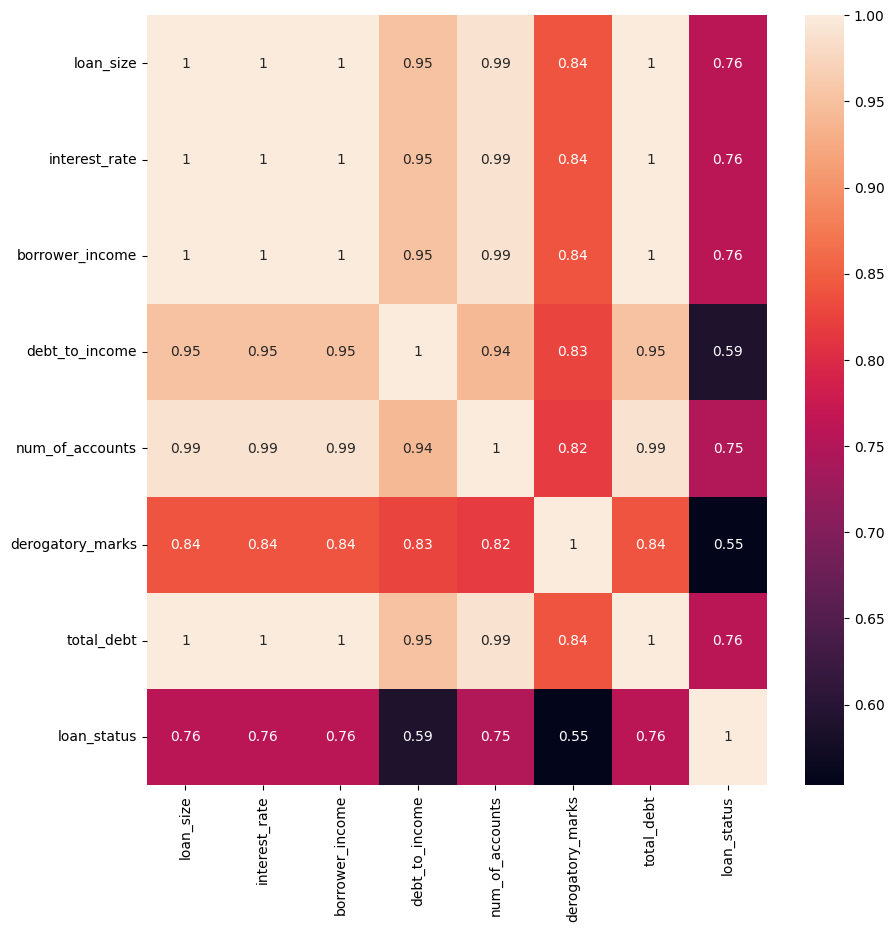

In [10]:
# plotting corlations beteen each features with label data
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='loan_status', ylabel='count'>

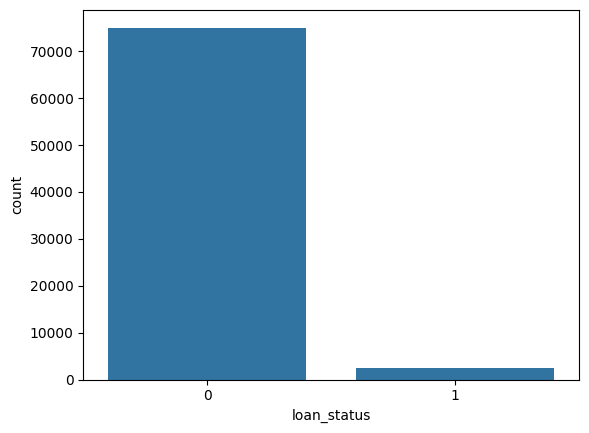

In [11]:
# there are two label values which are 1 and 0.
# getting the count of each label in the dataset 
sns.countplot(x = df['loan_status'])

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [6]:
# Separate the data into labels and features

# Separate the y variable, the labels
Y =  df['loan_status']

# Separate the X variable, the features
X = df.drop(columns=['loan_status'])

In [7]:
# Review the y variable Series
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [8]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [14]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [15]:
# getting the dimensions of the train data
print(X_train.shape)

(62028, 7)


In [17]:
# getting dimension of the test data
print(X_test.shape)

(15508, 7)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [18]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fit the model using training data
model.fit(X_train, Y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [19]:
# Make a prediction using the testing data
Y_predict_test = model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [20]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(Y_test, Y_predict_test)

print(conf_matrix)

[[14924    77]
 [   31   476]]


<Axes: >

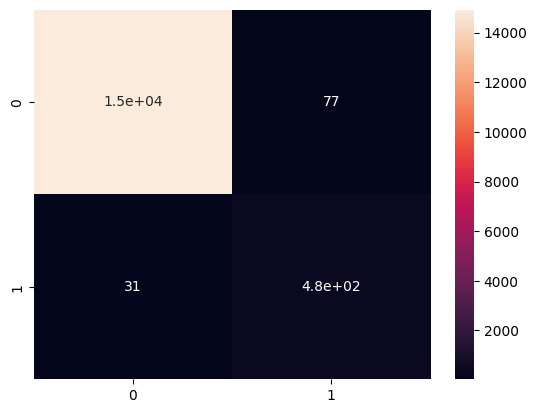

In [21]:
# intrepeting confusion matrix visually
sns.heatmap(conf_matrix, annot=True)

In [22]:
# Print the classification report for the model
class_report = classification_report(Y_test, Y_predict_test)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.86      0.94      0.90       507

    accuracy                           0.99     15508
   macro avg       0.93      0.97      0.95     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** According to the results we can see the model perform very well for label '0'(healthy loan). It achives a precision of 1.00 which indicates that predicted healthy loans are indeed healthy loans. The recall value also have high value as 0.99, which indicate that the model correctly identifies most of the actual healthy loans. The value of the F1 score also perfect at 1.00. 

But consider about the predicting label '1'(high-risk-loan), the model perform leasonably well but shoul be improve. It shows the accuracy of 0.86 which indicate that about 86% of the predictions for high risk loans are actually high risk loans. The recall value is 0.94 which shows model correctly identifies 94% of the actual; high risk loans. 

Considering the overall performance of the model, it predict healthy loans very well with higher precision and recall while predict risk loans reasonably well. 

---